# Transfer Learning Implementation 


#### Learning objectives

By the end of this lab, you will:

 - Import necessary libraries and load the dataset.
 - Load a pre-trained model, VGG16, excluding the top layers.
 - Add new layers on top of the base model and compile the model.
 - Train the model on the new dataset.
 - Unfreeze some of the layers of the pre-trained model and fine-tune them.



### Step-by-Step Guide: 

#### Step 1: Setup the Environment 

Before we start, make sure to import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as `tensorflow.keras`. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### Explanation:
- `tensorflow` is the main library for machine learning in Python.
- `Sequential` is used to create a model with a linear stack of layers.
- `Dense` and `Flatten` are types of layers that we will use in our model.


#### Step 2: Load Pre-trained Model 


In [2]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

#### Step 3: Create and Compile the Model 


In [3]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Change to the number of classes you have
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### **Create Placeholder Images**


In [4]:
import os
from PIL import Image
import numpy as np

os.makedirs('sample_data/class_a', exist_ok=True)
os.makedirs('sample_data/class_b', exist_ok=True)

for i in range(10):
    img = Image.fromarray(np.ones((224, 224, 3), dtype=np.uint8) * 255)
    img.save(f'sample_data/class_a/img_{i}.jpg')

    img = Image.fromarray(np.zeros((224, 224, 3), dtype=np.uint8))
    img.save(f'sample_data/class_b/img_{i}.jpg')

print("Sample images created in 'sample_data/'")


Sample images created in 'sample_data/'


#### Step 4: Train the Model 


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.")

if train_generator.samples > 0:
    model.fit(train_generator, epochs=10)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10


b:\Git hub\Deep_Learning\.env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7024
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step - accuracy: 0.5000 - loss: 5.0243
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step - accuracy: 0.5000 - loss: 0.7823
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step - accuracy: 0.5000 - loss: 0.8399
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step - accuracy: 0.5000 - loss: 1.0012
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step - accuracy: 0.5000 - loss: 0.9703
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step - accuracy: 0.5000 - loss: 0.8522
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step - accuracy: 0.5000 - loss: 0.7078
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step - accuracy: 0.5000 - loss: 0.5861
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step - accuracy: 1.0000 - loss: 0.5239


#### Step 5: Fine-Tune the Model 


In [6]:
for layer in base_model.layers[-4:]:
    layer.trainable = True 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

model.fit(train_generator, epochs=10) 

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.5354
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step - accuracy: 0.5000 - loss: 27.1444
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 962ms/step - accuracy: 0.5000 - loss: 3.6508
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step - accuracy: 0.5000 - loss: 0.8034
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step - accuracy: 0.5000 - loss: 0.7716
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step - accuracy: 0.5000 - loss: 0.6881
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step - accuracy: 0.5000 - loss: 0.6814
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step - accuracy: 0.5000 - loss: 0.6198
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step - accuracy: 0.5000 - loss: 0.6103
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step - accuracy: 0.5000 - loss: 0.7692


### Exercises


#### Exercise 1: Visualize Training and Validation Loss

**Objective:** Plot the training and validation loss to observe the learning process of the model.

**Instructions:**
1. Modify the training code to include validation data.
2. Plot the training and validation loss for each epoch.


Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.5473 - val_accuracy: 0.5000 - val_loss: 0.5193
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.5193 - val_accuracy: 0.5000 - val_loss: 0.4662
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.4662 - val_accuracy: 1.0000 - val_loss: 0.3466
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 999ms/step - accuracy: 1.0000 - loss: 0.3466 - val_accuracy: 0.5000 - val_loss: 0.4712
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step - accuracy: 0.5000 - loss: 0.4712 - val_accuracy: 0.5000 - val_loss: 0.3702
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.3702 - val_accuracy: 1.0000 - val_loss: 0.1054
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.1054 - val_accuracy: 1.0000 - val_loss: 0.2495
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step - ac

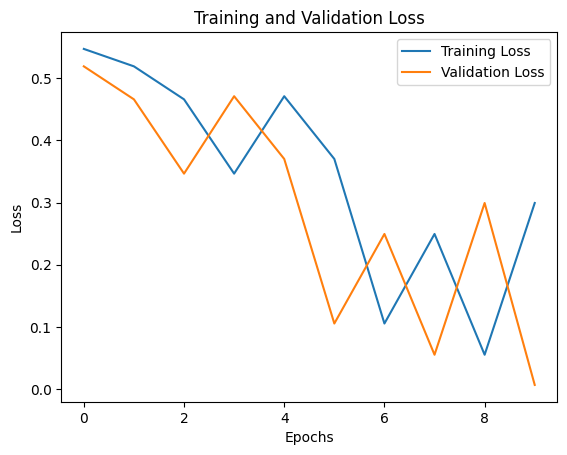

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Exercise 2: Experiment with Different Optimizers

**Objective:** Experiment with different optimizers and observe their impact on model performance.

**Instructions:**
1. Change the optimizer from `adam` to `sgd` and `rmsprop`.
2. Retrain the model with each optimizer and compare the accuracy.


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 999ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 994ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoc

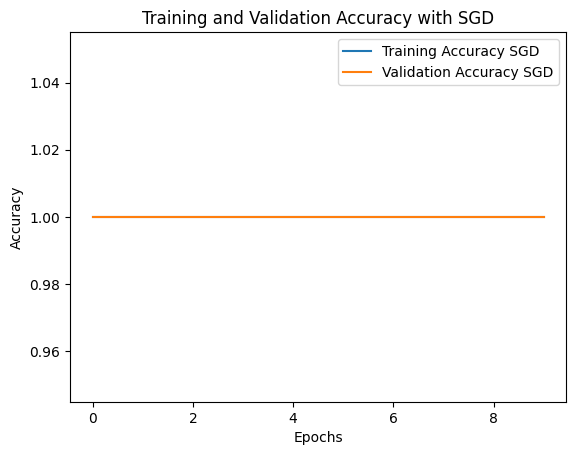

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 0.5000 - val_loss: 23.8590
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 23.8590 - val_accuracy: 0.5000 - val_loss: 66.7071
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 66.7071 - val_accuracy: 0.5000 - val_loss: 2.5019
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 2.5019 - val_accuracy: 0.5000 - val_loss: 4.4076
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 4.4076 - val_accuracy: 0.5000 - val_loss: 2.0947
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 2.0947 - val_accuracy: 0.5000 - val_loss: 0.6981
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6981 - val_accuracy: 1.0000 - val_loss: 0.4961
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.4961 - val_accuracy: 0.5000 - val_loss: 0.4596
Epoch 9/10
1

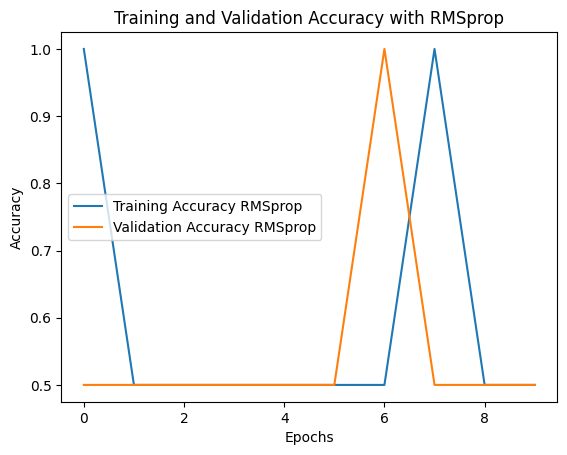

In [8]:
from tensorflow.keras.models import clone_model
import matplotlib.pyplot as plt

def reset_model(model):
    model_clone = clone_model(model)
    model_clone.set_weights(model.get_weights())
    return model_clone

initial_model = reset_model(model)  # Assume 'model' is the initial compiled model

sgd_model = reset_model(initial_model)  # Reset model
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(train_generator, epochs=10, validation_data=validation_generator)

plt.plot(history_sgd.history['accuracy'], label='Training Accuracy SGD')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy SGD')
plt.title('Training and Validation Accuracy with SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

rmsprop_model = reset_model(initial_model)
rmsprop_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = rmsprop_model.fit(train_generator, epochs=10, validation_data=validation_generator)

plt.plot(history_rmsprop.history['accuracy'], label='Training Accuracy RMSprop')
plt.plot(history_rmsprop.history['val_accuracy'], label='Validation Accuracy RMSprop')
plt.title('Training and Validation Accuracy with RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Exercise 3: Evaluate the Model on a Test Set

**Objective:** Evaluate the fine-tuned model on an unseen test set to assess its generalization performance.

**Instructions:**
1. Load a separate test set.
2. Evaluate the model on this test set and report the accuracy and loss.


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

Found 20 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step - accuracy: 1.0000 - loss: 0.0066
Test Accuracy: 100.00%
Test Loss: 0.0066


### Summary

By completing these exercises, students will:

1. Visualize the training and validation loss to gain insights into the training process.
2. Experiment with different optimizers to understand their impact on model performance.
3. Evaluate the fine-tuned model on an unseen test set to assess its generalization capability.
